## 04-02. OpenCV 

### Basic Practice

### Now, we will use this image to pratice some function.
<img style="float: left;"  src="images/city.png"  width="30%">

In [ ]:
#Remember to import these head file

import numpy  as  np
import scipy  as  sp
import cv2

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels

#### 1. Load Picture And Color


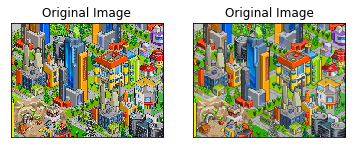

In [0]:
# Read Image "city.png" in "images/" folder. 

#img = cv2.imread( "file_location/city.png" )
img = cv2.imread(   )  # <- Finish here #

#Resize Image to (800,640)
#img = cv2.resize( file,(width,height) )
img_resize = cv2.resize(   )  # <- Finish here #

#Get a copy of your picture form BGR into RGB
img_RGB = cv2.cvtColor(img_resize,cv2.COLOR_BGR2RGB)

#Get a copy of your picture form BGR into HSV
img_hsv = cv2.cvtColor(img_resize,cv2.COLOR_BGR2HSV ) 
    

    
#Show your picture with the original size and the new one.

plt.imshow(img_RGB,cmap = 'brg')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()  

plt.imshow(     )  # <- Finish here #  
plt.title('Resize Image'), plt.xticks([]), plt.yticks([])
plt.show()  
    
# What if we cancel the line turning BGR into RGB ?


#### 2. Finding Edge

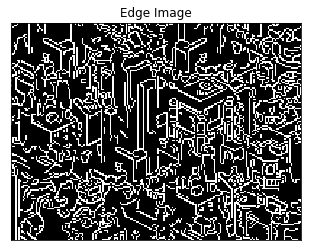

In [0]:
#Use Canny to find the edge of road.jpg

gray = cv2.cvtColor (img_resize,cv2.COLOR_BGR2GRAY)

# Canny: cv2.Canny(file ,kernel_width,kernel_height) 
# Set the kernel size to (70,70)

edges = cv2.Canny(    )  # <- Finish here #

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

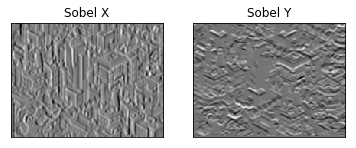

In [0]:
#Try to find edge with other convolution setting

sobel_x = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
sobel_y = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)
 
plt.subplot(121),plt.imshow(sobel_x,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(sobel_y,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

# Compile this block to see waht will happened. 

#### 3. Finding Color With HSV
<img style="float: left;"  src="images/Triangulo_HSV.png"  width="20%">

In [0]:
# Set the limit of color we want to find

# Remember, the range of H is 0 ~ 180 !
    
## Red
Range_red1 = np.array([165,100,100])
Range_red2 = np.array([180,255,255]) # <- red will met the edge point of H
Range_red3 = np.array([0,100,100])
Range_red4 = np.array([15,255,255])
    
## Yellow
Range_yellow1 = np.array([25,100,100])  # <- Modify here #
Range_yellow2 = np.array([45,255,255])  # <- Modify here #

#Finish your code below# 

## Blue  
Range_blue1 = np.array([    ]) # <- Finish here #
Range_blue2 = np.array([    ])    

## White : include all H, lower S, and higher V  
Range_white1 = np.array([    ])
Range_white2 = np.array([    ])
    
## Black
Range_black1 = np.array([    ]) 
Range_black2 = np.array([    ]) 

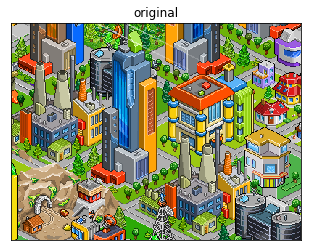

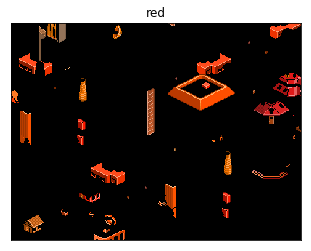

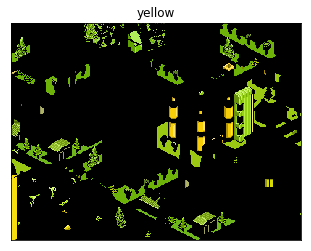

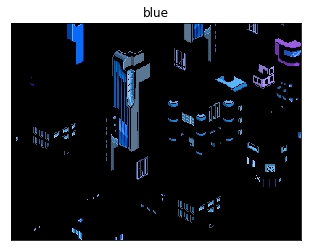

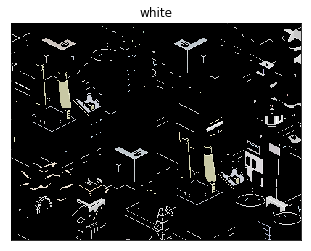

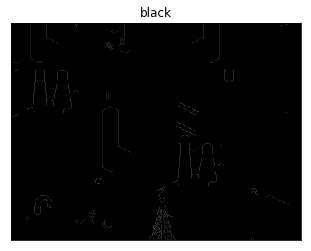

In [0]:
# Let's see your result

### Get the mask
red1 = cv2.inRange(img_hsv,Range_red1,Range_red2)
red2 = cv2.inRange(img_hsv,Range_red3,Range_red4)
mask_red = cv2.bitwise_or(red1,red2)

mask_yellow = cv2.inRange(img_hsv,Range_yellow1,Range_yellow2)
mask_blue =  cv2.inRange(      )  # <- Finish here #
mask_white = cv2.inRange(      )  
mask_black = cv2.inRange(      )  


### Apply the mask
img_red = cv2.bitwise_and(img_RGB,img_RGB, mask= mask_red)
img_yellow = cv2.bitwise_and(img_RGB,img_RGB, mask= mask_yellow)
img_blue = cv2.bitwise_and(img_RGB,img_RGB, mask= mask_blue )
img_white = cv2.bitwise_and(img_RGB,img_RGB, mask= mask_white )
img_black = cv2.bitwise_and( img_RGB,img_RGB, mask= mask_black)

### Plot your work
plt.imshow(img_RGB,cmap = 'brg')
plt.title('original'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_red,cmap = 'brg')
plt.title('red'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_yellow,cmap = 'brg')
plt.title('yellow'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_blue,cmap = 'brg')
plt.title('blue'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_white,cmap = 'brg')
plt.title('white'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(img_black,cmap = 'brg')
plt.title('black'), plt.xticks([]), plt.yticks([])
plt.show()


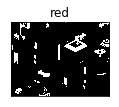

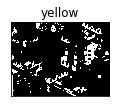

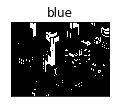

In [0]:
# BTW, this is how your MASK looks like.

plt.subplot(131),plt.imshow(mask_red,cmap = 'gray')
plt.title('red'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(132),plt.imshow(mask_yellow,cmap = 'gray')
plt.title('yellow'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(133),plt.imshow(mask_black,cmap = 'gray')
plt.title('black'), plt.xticks([]), plt.yticks([])
plt.show()

#### 4. Change Into The Same Color With RGB

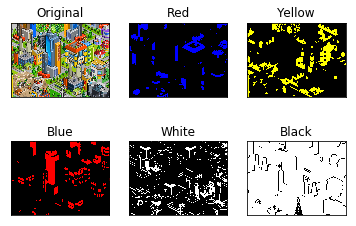

In [0]:
### Change the space in mask into the same color

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3, 3))
ker_white = cv2.dilate(mask_white, kernel)
ker_yellow = cv2.dilate(mask_yellow, kernel)
ker_red = cv2.dilate(mask_red, kernel)
ker_blue = cv2.dilate(mask_blue, kernel)
ker_black = cv2.dilate(mask_black, kernel)

plt.subplot(231),plt.imshow(img_RGB,cmap = 'brg')
plt.title('Original'), plt.xticks([]), plt.yticks([])

x = cv2.cvtColor(ker_red, cv2.COLOR_GRAY2RGB)
x[:,:,0] = x[:,:,0] * 1
x[:,:,1] = x[:,:,1] * 0
x[:,:,2] = x[:,:,2] * 0
plt.subplot(232),plt.imshow(x,cmap = 'brg')
plt.title('Red'), plt.xticks([]), plt.yticks([])

x = cv2.cvtColor(ker_yellow, cv2.COLOR_GRAY2RGB)
x[:,:,0] = x[:,:,0] * 1
x[:,:,1] = x[:,:,1] * 1
x[:,:,2] = x[:,:,2] * 0
plt.subplot(233),plt.imshow(x,cmap = 'brg')
plt.title('Yellow'), plt.xticks([]), plt.yticks([])

####################################################
#### Finish your code below with Blue and Black ####
####################################################
#
#  Hint:
#    x[:,:,0] control the RED color
#    x[:,:,1] control the GREEN color
#    x[:,:,2] control the BLUE color
#    And there range are 0~255 
#    When it is white, it should be (255,255,255) 
# 

x = cv2.cvtColor(ker_blue, cv2.COLOR_GRAY2RGB)
x[:,:,0] =   # <- Finish here #
x[:,:,1] = 
x[:,:,2] = 
plt.subplot(234),plt.imshow(x,cmap = 'brg')
plt.title('Blue'), plt.xticks([]), plt.yticks([])


x = cv2.cvtColor(ker_white, cv2.COLOR_GRAY2RGB)
plt.subplot(235),plt.imshow(x,cmap = 'brg')
plt.title('White'), plt.xticks([]), plt.yticks([])

# Remember, the value of x in 3 channel is rather 0(black) or 1(white) !
x = cv2.cvtColor(ker_black, cv2.COLOR_GRAY2RGB)
x[:,:,0] =  # <- Finish here #
x[:,:,1] = 
x[:,:,2] = 
plt.subplot(236),plt.imshow(x,cmap = 'brg')
plt.title('Black'), plt.xticks([]), plt.yticks([])


#### Finish your code above with Blue and Black ####
####################################################

plt.show()

### Advance Chanllenge

#### 1. Reload Another Picture
        
<img style="float: left;"  src="images/road.jpg"  width="50%">

In [0]:
# We are going to use another picture this time.
# Please go back to the img reading block at the start of the lab,
# make it reading images/road.jpg this time,
# and compile them all again to find its color and edge.

#### 2. Finding Edge Of The Specific Color

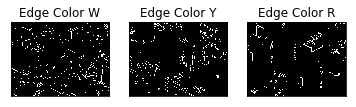

In [0]:
# Now, Try to find the edge of the specific color in picture.

edge_color_white  =   cv2.bitwise_and(edges,ker_white)
edge_color_yellow =   # Finish your code here #
edge_color_red    =   # Finish your code here #

plt.subplot(131),plt.imshow(edge_color_white,cmap = 'gray')
plt.title('Edge Color W'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edge_color_yellow,cmap = 'gray')
plt.title('Edge Color Y'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edge_color_red,cmap = 'gray')
plt.title('Edge Color R'), plt.xticks([]), plt.yticks([])

plt.show()

#### 3. Detecting Line

In [0]:
# Finding line with the function we learn.

lines_white = cv2.HoughLinesP(edge_color_white,1,np.pi/180,10,np.empty(1),1.5,1)
lines_yellow = cv2.HoughLinesP(edge_color_yellow,1,np.pi/180,10,np.empty(1),1.5,1)
lines_red = cv2.HoughLinesP(edge_color_red,1,np.pi/180,10,np.empty(1),1.5,1)

print (len(lines_white))
print (len(lines_yellow))
print (len(lines_red))

# Compile this block to see what happened. 

806
935
571


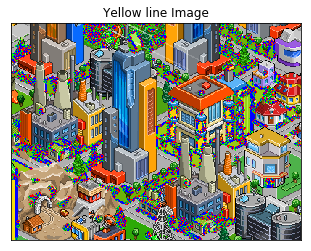

In [0]:
#Show the line you find. (Yellow)

color = "yellow"
lines = lines_yellow

image_with_lines = np.copy(img_RGB)
if len(lines)>0 :
    for i in range(len(lines)):
        x1 = lines[i][0][0]
        y1 = lines[i][0][1]
        x2 = lines[i][0][2]
        y2 = lines[i][0][3]
        cv2.line(image_with_lines, (x1,y1), (x2,y2), (0,0,255), 2)
        cv2.circle(image_with_lines, (x1,y1), 2, (0,255,0))
        cv2.circle(image_with_lines, (x2,y2), 2, (255,0,0))
        
plt.imshow(image_with_lines,cmap = 'brg')
plt.title('Yellow line Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Compile this block to see what happened. 

In [0]:
#Now, Try to show the line of Red and White.

####### Finish your code down here ######





#########################################
